**This is code shared by [Chris Deotte](https://www.kaggle.com/cdeotte) in a Discussion**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


AUC =  0.6343


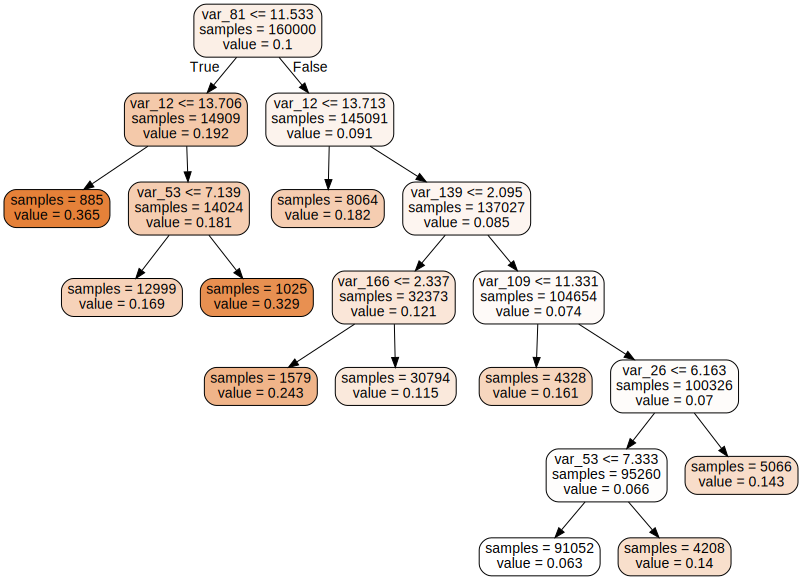

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn import tree
import graphviz
train = pd.read_csv('../input/train.csv')
cols = []
for i in range(0,200):
    cols.append('var_'+str(i))
    
valid = train.sample(frac=0.2, random_state=42)
train = train[ ~train.index.isin(valid.index) ].sample(frac=1)

#model = tree.DecisionTreeClassifier(max_leaf_nodes=4)
model = tree.DecisionTreeRegressor(max_leaf_nodes=10)
model.fit(train[cols], train['target'])
#pred_val = model.predict_proba(valid[cols])[:,1]
pred_val = model.predict(valid[cols])

print('AUC = ',round( roc_auc_score(valid['target'],pred_val),4 ) )
tree_graph = tree.export_graphviz(model, out_file=None, max_depth = 10,
    impurity = False, feature_names = cols, class_names = ['0', '1'],
    rounded = True, filled= True )
graphviz.Source(tree_graph)  